In [1]:
from pathlib import Path

import numpy as np
import healpy as hp
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

from tqdm import tqdm  # For progress bars

from cmbml.utils.handle_data import get_map_dtype, get_planck_obs_data, get_planck_noise_data

In [2]:
import logging

In [3]:
logger = logging.getLogger("handle_data")
logger.setLevel(logging.DEBUG)

In [4]:
DATA_ROOT = "/data/jim/CMB_Data/"
ASSETS_DIRECTORY = f"{DATA_ROOT}/Assets/Planck/"
PLANCK_NOISE_DIR = f"{DATA_ROOT}/Planck_Noise/"

DETECTOR = 100
N_PLANCK_SIMS = 50

NSIDE = 2048

In [5]:
def get_lmax_for_nside(nside):
    """Helper function: Max ell for a given nside; to be considered a parameter"""
    return 3 * nside - 1

# Setup

In [6]:
def plot_ps(ps,
            title=None, 
            x_low=1,
            x_high=1e4,
            y_low=1e-4,
            y_high=1e2,
            white_noise_expected=None):
    y_label="$N_{\\ell}(\\mu K^2)$"
    x_label="$\\ell$"
    plt.figure()
    plt.plot(ps)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.yscale('log')
    if white_noise_expected is not None:
        plt.axhline(y=white_noise_expected, color='black', linestyle='--')
        plt.text(y=white_noise_expected, x=x_high, s="$\\sigma_{\\ell}=" + f"{white_noise_expected:.1e}$", 
                 color='black',
                 horizontalalignment='right', verticalalignment='bottom')
    plt.xlim([x_low, x_high])
    plt.ylim([y_low, y_high])
    plt.title(title)
    plt.show()

In [7]:
def plot_many_ps(ps_s,
            title=None, 
            x_low=0.7,
            x_high=1e4,
            y_low=1e-4,
            y_high=1e2,
            styles=None,
            labels=None,
            white_noise_expected=None,
            has_planck=False,
            legend=True):
    y_label="$N_{\\ell}(\\mu K^2)$"
    x_label="$\\ell$"
    plt.figure()
    ells = np.arange(len(ps_s[0])).astype(float)
    if x_low < 1:
        ells[0] = x_low
    for i, ps in enumerate(ps_s):
        style=None
        linewidth=None
        color=None
        alpha=0.1
        if styles is None:
            pass
        elif styles[i] != "-":
            style = styles[i]
            linewidth = 2
        else:
            style = styles[i]
            linewidth = 1
        if has_planck and i == 0:
            color='black'
            linewidth=3
            alpha=1
        label = None if labels is None else labels[i]
        plt.plot(ells, ps, label=label, linestyle=style, color=color, linewidth=linewidth, alpha=alpha)
    if white_noise_expected is not None:
        plt.axhline(y=white_noise_expected, color='black', linestyle='--', linewidth=1)
        plt.text(y=white_noise_expected, x=x_high, s="$\\sigma_{\\ell}=" + f"{white_noise_expected:.1e}$", 
                 color='black',
                 horizontalalignment='right', verticalalignment='bottom')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([x_low-0.00001, x_high])
    plt.ylim([y_low, y_high])
    plt.title(title)
    if legend:
        plt.legend()
    plt.show()

In [8]:
def plot_many_ps_hl_last(ps_s,
            title=None, 
            x_low=0.7,
            x_high=1e4,
            y_low=1e-4,
            y_high=1e2,
            styles=None,
            labels=None,
            white_noise_expected=None,
            legend=True):
    y_label="$N_{\\ell}(\\mu K^2)$"
    x_label="$\\ell$"
    plt.figure()
    ells = np.arange(len(ps_s[0])).astype(float)
    if x_low < 1:
        ells[0] = x_low
    for i, ps in enumerate(ps_s):
        style=None
        linewidth=None
        color='green'
        alpha=0.2
        if styles is None:
            pass
        elif styles[i] != "-":
            style = styles[i]
            linewidth = 2
        else:
            style = styles[i]
            linewidth = 1
        if i == len(ps_s) - 1:
            color='black'
            linewidth=3
            alpha=1
        label = None if labels is None else labels[i]
        plt.plot(ells, ps, label=label, linestyle=style, color=color, linewidth=linewidth, alpha=alpha)
    if white_noise_expected is not None:
        plt.axhline(y=white_noise_expected, color='black', linestyle='--', linewidth=1)
        plt.text(y=white_noise_expected, x=x_high, s="$\\sigma_{\\ell}=" + f"{white_noise_expected:.1e}$", 
                 color='black',
                 horizontalalignment='right', verticalalignment='bottom')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([x_low-0.00001, x_high])
    plt.ylim([y_low, y_high])
    plt.title(title)
    if legend:
        plt.legend()
    plt.show()

In [9]:
def plot_many_ps_hl_last2(ps_s,
            title=None, 
            x_low=0.7,
            x_high=1e4,
            y_low=1e-4,
            y_high=1e2,
            styles=None,
            colors=None,
            alphas=None,
            labels=None,
            white_noise_expected=None,
            legend=True):
    y_label="$N_{\\ell}(\\mu K^2)$"
    x_label="$\\ell$"
    plt.figure()
    ells = np.arange(len(ps_s[0])).astype(float)
    if x_low < 1:
        ells[0] = x_low
    for i, ps in enumerate(ps_s):
        style=None
        linewidth=None
        color='green'
        alpha=0.05
        if styles is None:
            pass
        elif styles[i] != "-":
            style = styles[i]
            linewidth = 2
        else:
            style = styles[i]
            linewidth = 1
        if i == len(ps_s) - 1:
            color='black'
            linewidth=3
            alpha=1
        label = None if labels is None else labels[i]
        if colors is not None:
            color = colors[i]
        if alphas is not None:
            alpha = alphas[i]
        plt.plot(ells, ps, label=label, linestyle=style, color=color, linewidth=linewidth, alpha=alpha)
    if white_noise_expected is not None:
        plt.axhline(y=white_noise_expected, color='black', linestyle='--', linewidth=1)
        plt.text(y=white_noise_expected, x=x_high, s="$\\sigma_{\\ell}=" + f"{white_noise_expected:.1e}$", 
                 color='black',
                 horizontalalignment='right', verticalalignment='bottom')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim([x_low-0.00001, x_high])
    plt.ylim([y_low, y_high])
    plt.title(title)
    if legend:
        plt.legend()
    plt.show()

In [10]:
def make_map_hist(some_map, noise_level, title=None, legend=False):
    if isinstance(some_map, list):
        for i, one_map in enumerate(some_map):
            label = f"Map {i}" if legend else None
            plt.hist(one_map, bins=100, histtype='step', label=label)
    else:
        plt.hist(some_map, bins=100, histtype='step')
    plt.axvline(noise_level, color='black', linestyle='--', linewidth=1)
    plt.axvline(-noise_level, color='black', linestyle='--', linewidth=1)
    plt.text(x=-noise_level, y=175000, s=f"$-\\sigma$", color='black', 
            rotation=90,
            verticalalignment='center', horizontalalignment='right')
    offset = transforms.ScaledTranslation(2/72, 0, plt.gcf().dpi_scale_trans)
    plt.text(x=noise_level, y=175000, s=f"$+\\sigma$", color='black', 
            rotation=90,
            verticalalignment='center', horizontalalignment='left',
            transform=plt.gca().transData + offset)
    plt.xlabel("$\\mu K_{CMB}$")
    plt.ylabel("Pixel Count")
    if legend:
        plt.legend()
    plt.title(title)

# Planck Sims

In [11]:
lmax = get_lmax_for_nside(NSIDE)  # Defined above as 3*Nside-1

In [12]:
# Pre-download
for i in range(N_PLANCK_SIMS):
    src_map_fn = get_planck_noise_data(detector=DETECTOR, assets_directory=ASSETS_DIRECTORY, realization=i, progress=True)
print("All maps acquired!")

All maps acquired!


In [13]:
# Getting power spectra for 100 maps at 100 GHz takes ~50 minutes
src_cls = []
for i in tqdm(range(N_PLANCK_SIMS)):
    src_map_fn = get_planck_noise_data(detector=DETECTOR, assets_directory=ASSETS_DIRECTORY, realization=i, progress=True)
    t_src_map = hp.read_map(src_map_fn) * 1e6
    src_cls.append(hp.anafast(t_src_map, lmax=lmax))
del t_src_map

100%|██████████| 50/50 [23:19<00:00, 27.99s/it]


In [14]:
# Determine parameters for approximating the distribution

# Use log scaling for the power spectra; otherwise it's dominated by low ells
log_src_cls = np.log10(src_cls)

# We want to find the components that explain the majority of the variance
#   We don't have enough maps to fully determine the distribution, but a full
#   covariance matrix is overkill anyways. PCA gives a good, concise summary.
pca = PCA().fit(log_src_cls)

# We need the mean, the components (eigenvectors), and the variance (eigenvalues)
#   These are surrogates for the full covariance matrix
mean_ps = pca.mean_
components = pca.components_  
variance = pca.explained_variance_

In [15]:
# Save the results; delete the variables so we know we test loading them
np.savez("all_ps_100GHz.npz", mean=mean_ps, components=components, variance=variance)
del mean_ps, components, variance, pca, log_src_cls

In [16]:
# Load the results
data = np.load("all_ps_100GHz.npz")
mean_ps     = data['mean']
components  = data['components']
variance    = data['variance']

In [17]:
mean_ps.shape, components.shape, variance.shape

((6144,), (50, 6144), (50,))

In [18]:
num_components = len(variance)

# Generate random samples in the reduced space
num_samples = 100

std_devs = np.sqrt(variance[:num_components])
reduced_samples = np.random.normal(0, std_devs, (num_samples, num_components))

In [19]:
# Reconstruct power spectra in log10 space
reconstructed_log_ps = reduced_samples @ components[:num_components] + mean_ps

# Convert out of log10 space
reconstructed_ps = 10**reconstructed_log_ps

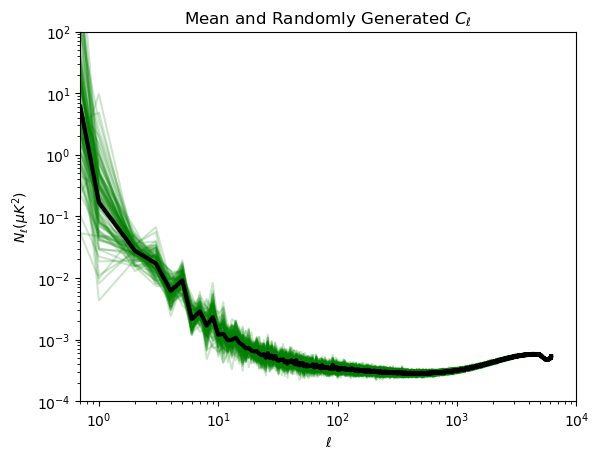

In [20]:
# Show mean power spectrum and random samples
#   Recall that the mean power spectrum is from the PCA analysis
#   It is in log10 space; we convert it here.
plot_many_ps_hl_last([*reconstructed_ps, 10**mean_ps], title="Mean and Randomly Generated $C_{\\ell}$", legend=False)

50


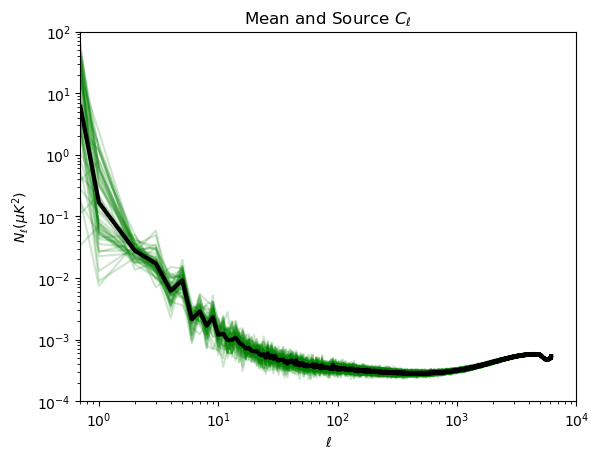

In [21]:
# Compare the above, generated power spectra (above) to the original power spectra (here)
print(len(src_cls))
plot_many_ps_hl_last([*src_cls, 10**mean_ps], title="Mean and Source $C_{\\ell}$", legend=False)

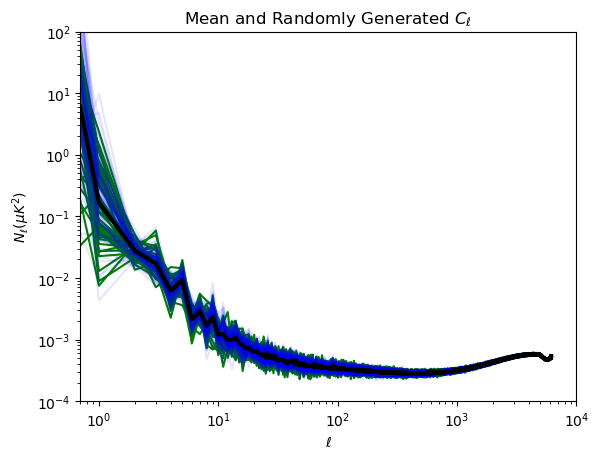

In [22]:
# I can't figure out a good way to plot the two distributions together
plot_many_ps_hl_last2([*src_cls, *reconstructed_ps, 10**mean_ps], title="Mean and Randomly Generated $C_{\\ell}$", 
                     colors=[*['green']*len(src_cls), *['blue']*len(reconstructed_ps), 'black'], 
                     alphas=[*[1]*len(src_cls), *[0.1]*len(reconstructed_ps), 1], legend=False)

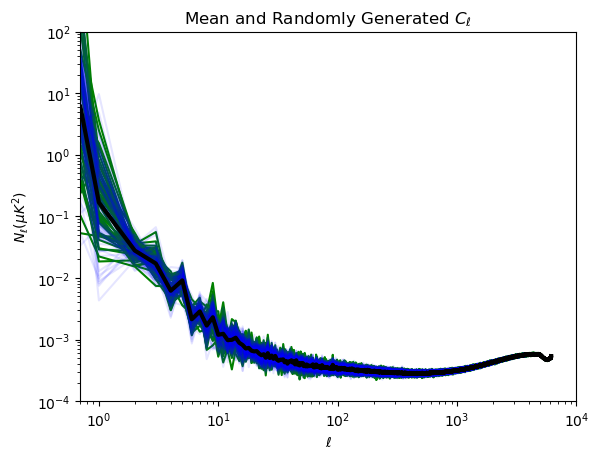

In [23]:
# I can't figure out a good way to plot the two distributions together
plot_many_ps_hl_last2([*reconstructed_ps, *src_cls, 10**mean_ps], title="Mean and Randomly Generated $C_{\\ell}$", 
                     colors=[*['green']*len(src_cls), *['blue']*len(reconstructed_ps), 'black'], 
                     alphas=[*[1]*len(src_cls), *[0.1]*len(reconstructed_ps), 1], legend=False)